In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
import shutil
from random import shuffle
import cv2
import glob
from os import listdir
from os.path import isfile, join
from hypopt import GridSearch
from tqdm import tqdm
from keras import utils

%matplotlib inline 

Using TensorFlow backend.


In [82]:
#The first path contains the spectrograms that I already correctly labeled
#The other one is the same but all the spectrograms are labelled using their track_id

PATH= "/Users/simoalami/Documents/Centrale/Machine Learning/Projet/Spectrograms_FMA_Small"
PATH_Copy="/Users/simoalami/Documents/Centrale/Machine Learning/Projet/Spectrograms_FMA_Small copie"

## Example

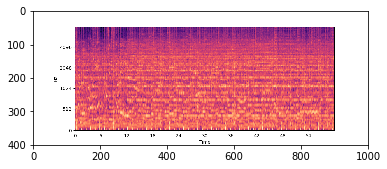

In [8]:
#Example of a spectrogram
img = mpimg.imread(PATH_Copy+"/10.png")
if img.dtype == np.float32: # Si le résultat n'est pas un tableau d'entiers
    img = (img * 255).astype(np.uint8)

plt.imshow(img)
plt.show()

In [14]:
#From spectrogram to np array
img = Image.open('/Users/simoalami/Documents/Centrale/Machine Learning/Projet/Spectrograms_FMA_Small copie/10.png')
np_array = np.asarray(img)
print(np_array.shape)
np_array=np_array[...,:3]
print(np_array.shape)

(400, 1000, 4)
(400, 1000, 3)


In [15]:
#From np array to image 

def numpy2pil(np_array: np.ndarray) -> Image:
    """
    Convert an HxWx3 numpy array into an RGB Image
    """

    assert_msg = 'Input shall be a HxWx3 ndarray'
    assert isinstance(np_array, np.ndarray), assert_msg
    assert len(np_array.shape) == 3, assert_msg
    assert np_array.shape[2] == 3, assert_msg

    img = Image.fromarray(np_array, 'RGB')
    return img

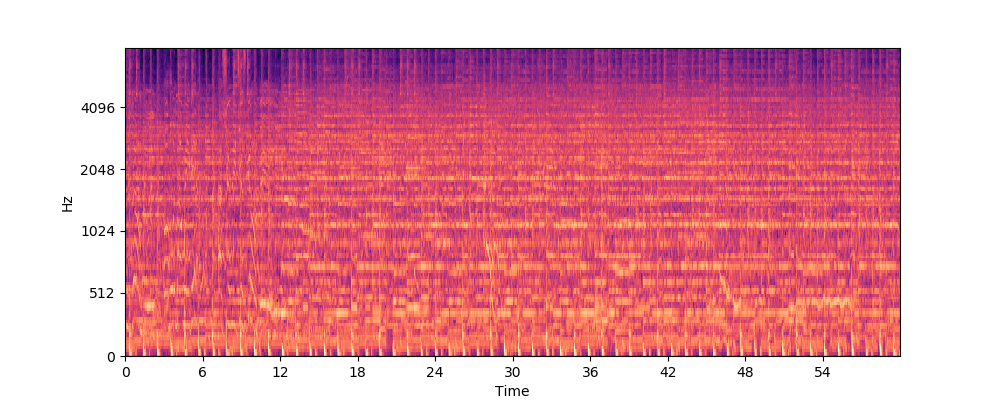

In [16]:
numpy2pil(np_array)

# Buiding training, validation and test sets

In [14]:
PATH_Complete="/Users/simoalami/Documents/Centrale/Machine Learning/Projet/Spectrograms_FMA_Small_complete"

In [6]:
#Importing the dataset
PATH_csv="/Users/simoalami/Documents/Centrale/Machine Learning/Projet/Latest_Work/fma_small_labels.csv"
data=pd.read_csv(PATH_csv)
print(data.shape)
data.head()

(8000, 3)


,track_id,parent_genre_id,parent_genre_title
0,2,21,Hip-Hop
1,5,21,Hip-Hop
2,10,10,Pop
3,140,17,Folk
4,141,17,Folk


In [8]:
n_classes = 8
n_examples = 7997

In [9]:
#Generating random y that will correspond to the different genres
y_true = np.random.randint(n_classes, size=(n_examples))

In [10]:
len(y_true)

7997

In [12]:
y_true[0:20]

array([7, 2, 0, 1, 4, 0, 7, 2, 6, 1, 5, 3, 2, 4, 2, 2, 1, 2, 7, 4])

In [15]:
#get all the filenames in folder
liste=[]
for filename in os.listdir(PATH_Complete):
    liste.append(filename)

In [16]:
liste[0:5]

['.png', '10.png', '100478.png', '100479.png', '100480.png']

In [17]:
liste.remove(".png")

In [18]:
#take only the track_id
s_liste=[]
for i in liste:
    s_liste.append(i.split('.')[0])
    
s_liste.sort()
print(s_liste[0:5])
len(s_liste)

['10', '100478', '100479', '100480', '100497']


7997

In [19]:
shuffle(s_liste)
print(s_liste[0:5])

['137725', '85791', '40986', '26301', '13220']


In [20]:
splitter = model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.3)

In [21]:
#y is randomly split into two groups
for train, val in splitter.split(np.random.rand(n_examples, 1), y_true):
    train_indices = train
    int_indices = val

In [22]:
print(train_indices)

[3894 7667 7819 ... 3620  217 1123]


In [23]:
print(int_indices)

[3905 3505 5174 ... 6776 7198 5618]


In [24]:
#every element in train is replaced by a track_id
train_index=[]
for element in train_indices:
    train_index.append(s_liste[element])

In [25]:
print(len(train_index))
print(train_index)

5597
['109963', '104725', '3920', '131922', '143106', '90530', '128992', '108839', '112314', '127203', '110771', '24430', '59658', '107182', '111225', '54570', '54062', '26011', '125824', '69798', '114538', '74385', '52034', '114416', '96408', '44782', '21895', '85600', '120317', '120150', '43518', '128888', '121592', '19415', '108476', '142418', '73367', '75754', '14580', '38323', '81554', '76375', '60544', '9513', '121257', '88861', '11264', '76654', '91098', '73170', '73675', '100522', '134054', '16819', '38352', '113359', '114291', '45393', '109355', '119193', '133943', '125293', '98547', '137716', '144542', '130683', '139537', '84605', '134053', '108968', '12049', '11299', '62671', '113304', '148246', '56641', '38363', '1544', '69785', '84156', '12067', '59719', '54064', '49070', '136137', '4093', '31165', '128619', '56799', '115925', '63805', '72786', '107183', '88429', '80004', '28546', '141878', '127623', '70813', '203', '88872', '99436', '52634', '110647', '101951', '126103', 

In [26]:
#creating validation indices
val_indices=[]
for i in range(round(len(int_indices)/3+1)):
    val_indices.append(int_indices[i])

In [27]:
print(val_indices)

[3905, 3505, 5174, 2128, 37, 6186, 2677, 6067, 2303, 1868, 7974, 3672, 4450, 1305, 3830, 320, 2066, 7188, 7373, 5767, 4183, 6036, 4232, 6650, 4560, 4880, 5668, 5881, 2747, 4178, 1217, 2197, 561, 6356, 6784, 4297, 2515, 5928, 4598, 3649, 4473, 1798, 1374, 3359, 7763, 7177, 447, 3988, 3293, 7919, 7891, 7292, 5485, 6395, 4028, 6569, 3461, 4284, 3193, 2912, 4190, 1666, 6218, 1609, 2345, 4783, 1026, 4563, 2557, 5341, 1580, 6118, 2490, 4101, 1439, 838, 4572, 6426, 2769, 7910, 508, 5303, 7677, 6931, 4162, 736, 5662, 2853, 2990, 2025, 2553, 1181, 7915, 2406, 7255, 3454, 3015, 2270, 787, 6800, 5476, 5807, 146, 3456, 7379, 6966, 7516, 161, 174, 5360, 2904, 3044, 1268, 1541, 5822, 4815, 1603, 4399, 4957, 1424, 7212, 4082, 5072, 792, 4329, 7056, 2199, 1381, 6760, 1781, 4871, 32, 742, 7441, 2815, 2865, 4681, 683, 303, 3594, 3103, 460, 7181, 5550, 7486, 4112, 515, 4166, 747, 5850, 6235, 7080, 4245, 7174, 6972, 4056, 2821, 6085, 5069, 3237, 2130, 45, 6812, 3116, 5382, 4324, 4767, 258, 169, 7028, 3937

In [28]:
#Creating test indices
test_indices=np.setdiff1d(int_indices,val_indices)
print(test_indices)

[   3    5   15 ... 7988 7989 7995]


In [29]:
#We see that the splitter has done evenly distributed splits between each genre
np.bincount(y_true[train_indices])

array([738, 695, 713, 669, 727, 694, 697, 664])

In [30]:
np.bincount(y_true[val_indices])

array([108, 100,  99,  90, 115,  96, 106,  87])

In [31]:
np.bincount(y_true[test_indices])

array([208, 197, 207, 197, 197, 202, 193, 198])

In [32]:
#Associating track_ids to validation set
val_index=[]
for element in val_indices:
    val_index.append(s_liste[element])

In [33]:
print(len(val_index))
print(val_index)

801
['92886', '32882', '4077', '4684', '59706', '103523', '73172', '63900', '141564', '129039', '119571', '74383', '124509', '69764', '10697', '49845', '69822', '60857', '119725', '86119', '74381', '63999', '119025', '71248', '120203', '87159', '118277', '144938', '66469', '11792', '110777', '11298', '58341', '134444', '91933', '96402', '131656', '21999', '6389', '97542', '109978', '133446', '55826', '51918', '125154', '78850', '65488', '574', '20424', '136449', '21167', '52945', '73372', '85787', '108489', '11504', '135221', '74959', '51919', '73193', '75866', '106343', '60048', '131787', '1685', '37920', '133273', '122510', '127208', '139123', '116447', '20296', '148032', '133432', '84159', '56274', '110207', '65090', '122631', '122798', '91793', '144543', '88868', '118327', '64866', '129092', '69303', '119097', '61172', '129396', '134952', '126674', '142566', '144180', '133638', '60510', '92554', '12348', '110264', '113017', '89814', '30316', '54158', '690', '46736', '5170', '46841'

In [34]:
#Associating track_ids to test set
test_index=[]
for element in test_indices:
    test_index.append(s_liste[element])

In [35]:
print(len(test_index))
print(test_index)

1599
['26301', '120196', '91187', '86039', '38435', '152418', '113357', '86037', '84200', '138018', '14315', '1642', '46078', '44854', '116878', '93918', '89704', '36428', '43857', '110410', '64409', '118972', '19422', '126226', '114936', '6605', '24429', '66482', '70426', '134384', '116882', '91089', '1277', '107952', '27673', '84201', '135028', '57819', '22000', '24720', '47666', '139804', '149140', '72069', '119719', '124392', '16095', '72234', '110985', '67357', '43587', '91083', '7393', '29526', '133449', '80793', '26021', '123494', '57440', '134077', '111382', '82932', '105671', '115392', '43520', '127266', '119994', '11675', '107029', '12486', '131764', '147020', '42014', '140934', '23014', '126885', '60872', '125289', '135989', '110449', '128812', '126786', '145458', '148532', '120318', '125779', '41019', '65040', '145005', '49029', '85954', '127180', '89212', '12109', '124485', '54237', '57371', '57418', '5', '91087', '15464', '38882', '8416', '1066', '149727', '134453', '1149

In [39]:
#rename all the spectrograms according to their genre using the track ids

for filename in os.listdir(PATH_Complete):
    for track_id in data["track_id"]:
        if filename.strip(" ").split(".")[0]==str(track_id).strip(" "):
            name=list(data[(data["track_id"]==track_id)]["parent_genre_title"])[0]
            old=PATH_Complete+"/"+filename
            new=PATH_Complete+"/"+name+"."+filename
            os.rename(old,new)

In [40]:
PATH_training ='/Users/simoalami/Documents/Centrale/Machine Learning/Projet/dataset_complete/Training Set'
PATH_test='/Users/simoalami/Documents/Centrale/Machine Learning/Projet/dataset_complete/Test Set'
PATH_val='/Users/simoalami/Documents/Centrale/Machine Learning/Projet/dataset_complete/Validation Set'

In [41]:
#Move every spectrogram to the folder it should belong to (i.e: training, validation or test)
for filename in os.listdir(PATH_Copy):
    print(filename)
    for element in train_index:
        if filename.strip(" ").split(".")[1]==element.strip(" "):
            print(element.strip(" "))
            shutil.move(PATH_Copy+"/"+filename,PATH_training+"/"+filename)
    for element in val_index:
        if filename.strip(" ").split(".")[1]==element.strip(" "):
            print(element.strip(" "))
            shutil.move(PATH_Copy+"/"+filename,PATH_val+"/"+filename)
    for element in test_index:
        if filename.strip(" ").split(".")[1]==element.strip(" "):
            print(element.strip(" "))
            shutil.move(PATH_Copy+"/"+filename,PATH_test+"/"+filename)
        

.png
Electronic.100497.png
100497
Electronic.100522.png
100522
Electronic.100535.png
100535
Electronic.100536.png
100536
Electronic.100544.png
100544
Electronic.100549.png
100549
Electronic.100550.png
100550
Electronic.100552.png
100552
Electronic.100745.png
100745
Electronic.100835.png
100835
Electronic.100972.png
100972
Electronic.100973.png
100973
Electronic.100975.png
100975
Electronic.100976.png
100976
Electronic.103600.png
103600
Electronic.104276.png
104276
Electronic.104277.png
104277
Electronic.104278.png
104278
Electronic.104279.png
104279
Electronic.104282.png
104282
Electronic.104283.png
104283
Electronic.104284.png
104284
Electronic.105408.png
105408
Electronic.105411.png
105411
Electronic.105412.png
105412
Electronic.105413.png
105413
Electronic.105414.png
105414
Electronic.105662.png
105662
Electronic.105664.png
105664
Electronic.105670.png
105670
Electronic.105671.png
105671
Electronic.105672.png
105672
Electronic.105673.png
105673
Electronic.105674.png
105674
Electroni

130135
Electronic.130136.png
130136
Electronic.130137.png
130137
Electronic.130920.png
130920
Electronic.130921.png
130921
Electronic.130922.png
130922
Electronic.130923.png
130923
Electronic.132134.png
132134
Electronic.132138.png
132138
Electronic.132420.png
132420
Electronic.132448.png
132448
Electronic.132773.png
132773
Electronic.132774.png
132774
Electronic.132775.png
132775
Electronic.133015.png
133015
Electronic.133016.png
133016
Electronic.133019.png
133019
Electronic.133020.png
133020
Electronic.133022.png
133022
Electronic.133023.png
133023
Electronic.133024.png
133024
Electronic.133025.png
133025
Electronic.133026.png
133026
Electronic.133027.png
133027
Electronic.133028.png
133028
Electronic.133029.png
133029
Electronic.134052.png
134052
Electronic.134053.png
134053
Electronic.134054.png
134054
Electronic.134359.png
134359
Electronic.134446.png
134446
Electronic.134447.png
134447
Electronic.134448.png
134448
Electronic.13474.png
13474
Electronic.134801.png
134801
Electroni

Electronic.46160.png
46160
Electronic.47068.png
47068
Electronic.47069.png
47069
Electronic.47070.png
47070
Electronic.47071.png
47071
Electronic.47072.png
47072
Electronic.47073.png
47073
Electronic.47074.png
47074
Electronic.47075.png
47075
Electronic.47076.png
47076
Electronic.47077.png
47077
Electronic.47260.png
47260
Electronic.47657.png
47657
Electronic.47658.png
47658
Electronic.47659.png
47659
Electronic.47660.png
47660
Electronic.48293.png
48293
Electronic.48437.png
48437
Electronic.48439.png
48439
Electronic.48440.png
48440
Electronic.48442.png
48442
Electronic.48443.png
48443
Electronic.48462.png
48462
Electronic.48463.png
48463
Electronic.48464.png
48464
Electronic.48465.png
48465
Electronic.48466.png
48466
Electronic.51784.png
51784
Electronic.51785.png
51785
Electronic.51923.png
51923
Electronic.51954.png
51954
Electronic.52409.png
52409
Electronic.52628.png
52628
Electronic.52629.png
52629
Electronic.52630.png
52630
Electronic.52631.png
52631
Electronic.52632.png
52632
E

Electronic.91082.png
91082
Electronic.91083.png
91083
Electronic.91084.png
91084
Electronic.91085.png
91085
Electronic.91086.png
91086
Electronic.91087.png
91087
Electronic.91088.png
91088
Electronic.91089.png
91089
Electronic.91619.png
91619
Electronic.91620.png
91620
Electronic.91621.png
91621
Electronic.91622.png
91622
Electronic.91623.png
91623
Electronic.91624.png
91624
Electronic.91625.png
91625
Electronic.91755.png
91755
Electronic.92275.png
92275
Electronic.92282.png
92282
Electronic.92283.png
92283
Electronic.92284.png
92284
Electronic.92366.png
92366
Electronic.92466.png
92466
Electronic.92546.png
92546
Electronic.92548.png
92548
Electronic.92549.png
92549
Electronic.92551.png
92551
Electronic.92554.png
92554
Electronic.92556.png
92556
Electronic.92561.png
92561
Electronic.92562.png
92562
Electronic.92564.png
92564
Electronic.93363.png
93363
Electronic.93364.png
93364
Electronic.93518.png
93518
Electronic.93519.png
93519
Electronic.93520.png
93520
Electronic.93521.png
93521
E

Experimental.122004.png
122004
Experimental.122106.png
122106
Experimental.122107.png
122107
Experimental.122132.png
122132
Experimental.122143.png
122143
Experimental.122153.png
122153
Experimental.122155.png
122155
Experimental.122166.png
122166
Experimental.122168.png
122168
Experimental.122199.png
122199
Experimental.122201.png
122201
Experimental.122204.png
122204
Experimental.122247.png
122247
Experimental.122261.png
122261
Experimental.122910.png
122910
Experimental.122959.png
122959
Experimental.123333.png
123333
Experimental.123342.png
123342
Experimental.12346.png
12346
Experimental.124154.png
124154
Experimental.124231.png
124231
Experimental.124409.png
124409
Experimental.124411.png
124411
Experimental.124509.png
124509
Experimental.124517.png
124517
Experimental.124518.png
124518
Experimental.124519.png
124519
Experimental.124870.png
124870
Experimental.124891.png
124891
Experimental.124892.png
124892
Experimental.1249.png
1249
Experimental.124971.png
124971
Experimental.1

Experimental.35199.png
35199
Experimental.35204.png
35204
Experimental.35444.png
35444
Experimental.35462.png
35462
Experimental.36567.png
36567
Experimental.36799.png
36799
Experimental.37041.png
37041
Experimental.37121.png
37121
Experimental.37538.png
37538
Experimental.37779.png
37779
Experimental.37781.png
37781
Experimental.37784.png
37784
Experimental.38312.png
38312
Experimental.38450.png
38450
Experimental.38847.png
38847
Experimental.38859.png
38859
Experimental.38879.png
38879
Experimental.38880.png
38880
Experimental.38881.png
38881
Experimental.38882.png
38882
Experimental.38884.png
38884
Experimental.38886.png
38886
Experimental.38887.png
38887
Experimental.38888.png
38888
Experimental.38890.png
38890
Experimental.38891.png
38891
Experimental.38892.png
38892
Experimental.38893.png
38893
Experimental.38894.png
38894
Experimental.38895.png
38895
Experimental.38896.png
38896
Experimental.38898.png
38898
Experimental.38899.png
38899
Experimental.38900.png
38900
Experimental.3

Experimental.67829.png
67829
Experimental.68407.png
68407
Experimental.68410.png
68410
Experimental.68536.png
68536
Experimental.68537.png
68537
Experimental.68538.png
68538
Experimental.68539.png
68539
Experimental.68540.png
68540
Experimental.68541.png
68541
Experimental.68543.png
68543
Experimental.68549.png
68549
Experimental.68551.png
68551
Experimental.68573.png
68573
Experimental.68579.png
68579
Experimental.68869.png
68869
Experimental.68872.png
68872
Experimental.68875.png
68875
Experimental.69001.png
69001
Experimental.69002.png
69002
Experimental.69303.png
69303
Experimental.69682.png
69682
Experimental.69784.png
69784
Experimental.69785.png
69785
Experimental.69787.png
69787
Experimental.69788.png
69788
Experimental.69789.png
69789
Experimental.69791.png
69791
Experimental.69792.png
69792
Experimental.69793.png
69793
Experimental.69798.png
69798
Experimental.70002.png
70002
Experimental.70005.png
70005
Experimental.70174.png
70174
Experimental.71884.png
71884
Experimental.7

Folk.109906.png
109906
Folk.10992.png
10992
Folk.10993.png
10993
Folk.110171.png
110171
Folk.110172.png
110172
Folk.110384.png
110384
Folk.110436.png
110436
Folk.110437.png
110437
Folk.110438.png
110438
Folk.110439.png
110439
Folk.110440.png
110440
Folk.110441.png
110441
Folk.11059.png
11059
Folk.110923.png
110923
Folk.110927.png
110927
Folk.110928.png
110928
Folk.111182.png
111182
Folk.111186.png
111186
Folk.111187.png
111187
Folk.111188.png
111188
Folk.112252.png
112252
Folk.113167.png
113167
Folk.113342.png
113342
Folk.113343.png
113343
Folk.113344.png
113344
Folk.113357.png
113357
Folk.113359.png
113359
Folk.113360.png
113360
Folk.113946.png
113946
Folk.113949.png
113949
Folk.113950.png
113950
Folk.11503.png
11503
Folk.11504.png
11504
Folk.11505.png
11505
Folk.11508.png
11508
Folk.115922.png
115922
Folk.115923.png
115923
Folk.115925.png
115925
Folk.115926.png
115926
Folk.115927.png
115927
Folk.115930.png
115930
Folk.115932.png
115932
Folk.115935.png
115935
Folk.115944.png
115944
Fo

148233
Folk.148234.png
148234
Folk.148235.png
148235
Folk.148532.png
148532
Folk.148535.png
148535
Folk.148602.png
148602
Folk.148603.png
148603
Folk.148604.png
148604
Folk.148605.png
148605
Folk.150062.png
150062
Folk.150063.png
150063
Folk.150064.png
150064
Folk.153946.png
153946
Folk.1544.png
1544
Folk.1701.png
1701
Folk.1702.png
1702
Folk.1703.png
1703
Folk.1704.png
1704
Folk.17132.png
17132
Folk.18159.png
18159
Folk.18350.png
18350
Folk.1893.png
1893
Folk.190.png
190
Folk.1924.png
1924
Folk.1925.png
1925
Folk.193.png
193
Folk.194.png
194
Folk.197.png
197
Folk.19707.png
19707
Folk.19708.png
19708
Folk.200.png
200
Folk.203.png
203
Folk.204.png
204
Folk.207.png
207
Folk.2097.png
2097
Folk.210.png
210
Folk.21087.png
21087
Folk.211.png
211
Folk.212.png
212
Folk.21707.png
21707
Folk.23014.png
23014
Folk.23015.png
23015
Folk.23371.png
23371
Folk.26302.png
26302
Folk.26464.png
26464
Folk.26465.png
26465
Folk.26466.png
26466
Folk.27258.png
27258
Folk.27804.png
27804
Folk.27855.png
27855
Fo

Folk.85487.png
85487
Folk.85488.png
85488
Folk.85489.png
85489
Folk.85490.png
85490
Folk.85491.png
85491
Folk.85492.png
85492
Folk.85691.png
85691
Folk.85692.png
85692
Folk.85693.png
85693
Folk.85963.png
85963
Folk.85966.png
85966
Folk.85967.png
85967
Folk.85968.png
85968
Folk.85973.png
85973
Folk.86623.png
86623
Folk.87965.png
87965
Folk.87966.png
87966
Folk.87967.png
87967
Folk.87968.png
87968
Folk.87971.png
87971
Folk.87972.png
87972
Folk.88846.png
88846
Folk.88848.png
88848
Folk.88854.png
88854
Folk.88856.png
88856
Folk.88858.png
88858
Folk.88860.png
88860
Folk.88861.png
88861
Folk.88863.png
88863
Folk.88864.png
88864
Folk.88867.png
88867
Folk.88868.png
88868
Folk.88869.png
88869
Folk.88870.png
88870
Folk.88871.png
88871
Folk.88872.png
88872
Folk.88873.png
88873
Folk.88874.png
88874
Folk.88875.png
88875
Folk.88876.png
88876
Folk.88877.png
88877
Folk.88878.png
88878
Folk.88879.png
88879
Folk.88892.png
88892
Folk.890.png
890
Folk.892.png
892
Folk.89350.png
89350
Folk.89441.png
89441


Hip-Hop.12526.png
12526
Hip-Hop.12531.png
12531
Hip-Hop.128441.png
128441
Hip-Hop.128443.png
128443
Hip-Hop.128494.png
128494
Hip-Hop.128666.png
128666
Hip-Hop.128668.png
128668
Hip-Hop.128927.png
128927
Hip-Hop.129674.png
129674
Hip-Hop.129675.png
129675
Hip-Hop.129806.png
129806
Hip-Hop.129807.png
129807
Hip-Hop.129808.png
129808
Hip-Hop.129904.png
129904
Hip-Hop.129910.png
129910
Hip-Hop.129914.png
129914
Hip-Hop.129915.png
129915
Hip-Hop.129918.png
129918
Hip-Hop.129919.png
129919
Hip-Hop.129920.png
129920
Hip-Hop.130168.png
130168
Hip-Hop.130170.png
130170
Hip-Hop.130218.png
130218
Hip-Hop.130440.png
130440
Hip-Hop.130454.png
130454
Hip-Hop.130456.png
130456
Hip-Hop.130650.png
130650
Hip-Hop.130702.png
130702
Hip-Hop.130709.png
130709
Hip-Hop.130710.png
130710
Hip-Hop.130711.png
130711
Hip-Hop.131016.png
131016
Hip-Hop.131019.png
131019
Hip-Hop.131020.png
131020
Hip-Hop.131021.png
131021
Hip-Hop.131422.png
131422
Hip-Hop.131425.png
131425
Hip-Hop.131426.png
131426
Hip-Hop.13199.pn

Hip-Hop.50264.png
50264
Hip-Hop.52579.png
52579
Hip-Hop.5264.png
5264
Hip-Hop.5268.png
5268
Hip-Hop.53379.png
53379
Hip-Hop.53381.png
53381
Hip-Hop.54365.png
54365
Hip-Hop.54376.png
54376
Hip-Hop.54753.png
54753
Hip-Hop.55097.png
55097
Hip-Hop.55100.png
55100
Hip-Hop.55101.png
55101
Hip-Hop.55102.png
55102
Hip-Hop.55113.png
55113
Hip-Hop.55119.png
55119
Hip-Hop.55120.png
55120
Hip-Hop.55121.png
55121
Hip-Hop.55122.png
55122
Hip-Hop.55123.png
55123
Hip-Hop.55124.png
55124
Hip-Hop.55549.png
55549
Hip-Hop.55572.png
55572
Hip-Hop.55900.png
55900
Hip-Hop.56493.png
56493
Hip-Hop.56495.png
56495
Hip-Hop.56496.png
56496
Hip-Hop.56497.png
56497
Hip-Hop.56498.png
56498
Hip-Hop.56499.png
56499
Hip-Hop.56639.png
56639
Hip-Hop.56640.png
56640
Hip-Hop.56641.png
56641
Hip-Hop.57819.png
57819
Hip-Hop.57820.png
57820
Hip-Hop.57821.png
57821
Hip-Hop.57822.png
57822
Hip-Hop.57823.png
57823
Hip-Hop.58207.png
58207
Hip-Hop.58212.png
58212
Hip-Hop.58213.png
58213
Hip-Hop.58215.png
58215
Hip-Hop.60472.png
60

Hip-Hop.97569.png
97569
Hip-Hop.97570.png
97570
Hip-Hop.97691.png
97691
Hip-Hop.97692.png
97692
Hip-Hop.97697.png
97697
Hip-Hop.97980.png
97980
Hip-Hop.97986.png
97986
Hip-Hop.97987.png
97987
Hip-Hop.97988.png
97988
Hip-Hop.97989.png
97989
Hip-Hop.98547.png
98547
Hip-Hop.98548.png
98548
Hip-Hop.98549.png
98549
Hip-Hop.98550.png
98550
Hip-Hop.98551.png
98551
Hip-Hop.98552.png
98552
Hip-Hop.98553.png
98553
Hip-Hop.98554.png
98554
Hip-Hop.98555.png
98555
Hip-Hop.98556.png
98556
Hip-Hop.98557.png
98557
Hip-Hop.98565.png
98565
Hip-Hop.98567.png
98567
Hip-Hop.98569.png
98569
Hip-Hop.98573.png
98573
Hip-Hop.98574.png
98574
Hip-Hop.98575.png
98575
Hip-Hop.98576.png
98576
Hip-Hop.98577.png
98577
Hip-Hop.98578.png
98578
Hip-Hop.98579.png
98579
Hip-Hop.98580.png
98580
Hip-Hop.98581.png
98581
Hip-Hop.98582.png
98582
Hip-Hop.98583.png
98583
Hip-Hop.98584.png
98584
Hip-Hop.98585.png
98585
Hip-Hop.98613.png
98613
Hip-Hop.98617.png
98617
Hip-Hop.98618.png
98618
Hip-Hop.98619.png
98619
Hip-Hop.98620.pn

120309
Instrumental.120310.png
120310
Instrumental.120312.png
120312
Instrumental.120313.png
120313
Instrumental.120314.png
120314
Instrumental.120315.png
120315
Instrumental.120316.png
120316
Instrumental.120317.png
120317
Instrumental.120318.png
120318
Instrumental.120319.png
120319
Instrumental.120320.png
120320
Instrumental.120321.png
120321
Instrumental.120322.png
120322
Instrumental.120323.png
120323
Instrumental.120324.png
120324
Instrumental.120325.png
120325
Instrumental.120326.png
120326
Instrumental.120327.png
120327
Instrumental.120328.png
120328
Instrumental.120329.png
120329
Instrumental.120330.png
120330
Instrumental.120331.png
120331
Instrumental.120332.png
120332
Instrumental.120333.png
120333
Instrumental.120504.png
120504
Instrumental.120513.png
120513
Instrumental.120514.png
120514
Instrumental.120515.png
120515
Instrumental.120769.png
120769
Instrumental.120770.png
120770
Instrumental.120771.png
120771
Instrumental.120772.png
120772
Instrumental.120773.png
120773
I

130934
Instrumental.130988.png
130988
Instrumental.130989.png
130989
Instrumental.130990.png
130990
Instrumental.130991.png
130991
Instrumental.130992.png
130992
Instrumental.130993.png
130993
Instrumental.131323.png
131323
Instrumental.131324.png
131324
Instrumental.131325.png
131325
Instrumental.131326.png
131326
Instrumental.131327.png
131327
Instrumental.131476.png
131476
Instrumental.131787.png
131787
Instrumental.131789.png
131789
Instrumental.131791.png
131791
Instrumental.131792.png
131792
Instrumental.131794.png
131794
Instrumental.131795.png
131795
Instrumental.131796.png
131796
Instrumental.131797.png
131797
Instrumental.131837.png
131837
Instrumental.131911.png
131911
Instrumental.131912.png
131912
Instrumental.131913.png
131913
Instrumental.131914.png
131914
Instrumental.131917.png
131917
Instrumental.131918.png
131918
Instrumental.131919.png
131919
Instrumental.131922.png
131922
Instrumental.131923.png
131923
Instrumental.131924.png
131924
Instrumental.131925.png
131925
I

Instrumental.150265.png
150265
Instrumental.150266.png
150266
Instrumental.150267.png
150267
Instrumental.150268.png
150268
Instrumental.152480.png
152480
Instrumental.152568.png
152568
Instrumental.152569.png
152569
Instrumental.152570.png
152570
Instrumental.20361.png
20361
Instrumental.20362.png
20362
Instrumental.20364.png
20364
Instrumental.20365.png
20365
Instrumental.20366.png
20366
Instrumental.20369.png
20369
Instrumental.20372.png
20372
Instrumental.20373.png
20373
Instrumental.20374.png
20374
Instrumental.20375.png
20375
Instrumental.20376.png
20376
Instrumental.30196.png
30196
Instrumental.37111.png
37111
Instrumental.37113.png
37113
Instrumental.37119.png
37119
Instrumental.37141.png
37141
Instrumental.37911.png
37911
Instrumental.40250.png
40250
Instrumental.40654.png
40654
Instrumental.40655.png
40655
Instrumental.40656.png
40656
Instrumental.40657.png
40657
Instrumental.40658.png
40658
Instrumental.40659.png
40659
Instrumental.40660.png
40660
Instrumental.41573.png
4157

International.113281.png
113281
International.113282.png
113282
International.113284.png
113284
International.113696.png
113696
International.113697.png
113697
International.113698.png
113698
International.113699.png
113699
International.113700.png
113700
International.113701.png
113701
International.114879.png
114879
International.114880.png
114880
International.114884.png
114884
International.114936.png
114936
International.114937.png
114937
International.114938.png
114938
International.114939.png
114939
International.114940.png
114940
International.114941.png
114941
International.114942.png
114942
International.114943.png
114943
International.115262.png
115262
International.115263.png
115263
International.115267.png
115267
International.115268.png
115268
International.115269.png
115269
International.115271.png
115271
International.115272.png
115272
International.115273.png
115273
International.11671.png
11671
International.11672.png
11672
International.11673.png
11673
International.

International.19459.png
19459
International.19673.png
19673
International.19674.png
19674
International.19889.png
19889
International.19890.png
19890
International.19891.png
19891
International.20432.png
20432
International.22315.png
22315
International.23155.png
23155
International.23156.png
23156
International.24362.png
24362
International.24363.png
24363
International.24364.png
24364
International.24365.png
24365
International.24366.png
24366
International.24367.png
24367
International.24368.png
24368
International.24369.png
24369
International.24370.png
24370
International.24371.png
24371
International.24698.png
24698
International.24699.png
24699
International.24700.png
24700
International.24701.png
24701
International.24702.png
24702
International.24717.png
24717
International.24720.png
24720
International.24739.png
24739
International.24741.png
24741
International.24742.png
24742
International.24745.png
24745
International.24746.png
24746
International.24747.png
24747
Internatio

52001
International.52118.png
52118
International.52119.png
52119
International.52120.png
52120
International.52121.png
52121
International.52122.png
52122
International.52123.png
52123
International.52124.png
52124
International.52125.png
52125
International.52126.png
52126
International.52127.png
52127
International.52128.png
52128
International.52129.png
52129
International.53152.png
53152
International.53154.png
53154
International.53156.png
53156
International.53157.png
53157
International.53158.png
53158
International.53159.png
53159
International.53160.png
53160
International.53299.png
53299
International.53300.png
53300
International.53301.png
53301
International.53302.png
53302
International.53723.png
53723
International.53724.png
53724
International.53725.png
53725
International.53726.png
53726
International.53727.png
53727
International.53728.png
53728
International.54433.png
54433
International.54436.png
54436
International.54437.png
54437
International.54438.png
54438
Inte

International.73778.png
73778
International.73779.png
73779
International.76069.png
76069
International.76071.png
76071
International.76072.png
76072
International.76073.png
76073
International.76074.png
76074
International.76075.png
76075
International.76076.png
76076
International.76077.png
76077
International.76078.png
76078
International.76079.png
76079
International.80341.png
80341
International.80351.png
80351
International.80680.png
80680
International.80686.png
80686
International.80687.png
80687
International.80693.png
80693
International.80694.png
80694
International.80695.png
80695
International.80696.png
80696
International.80697.png
80697
International.80751.png
80751
International.80753.png
80753
International.80754.png
80754
International.80755.png
80755
International.80756.png
80756
International.80758.png
80758
International.80765.png
80765
International.80766.png
80766
International.80772.png
80772
International.80773.png
80773
International.80774.png
80774
Internatio

Pop.127302.png
127302
Pop.127303.png
127303
Pop.127620.png
127620
Pop.127623.png
127623
Pop.127908.png
127908
Pop.127909.png
127909
Pop.127910.png
127910
Pop.127911.png
127911
Pop.127912.png
127912
Pop.127913.png
127913
Pop.127914.png
127914
Pop.127915.png
127915
Pop.128476.png
128476
Pop.128477.png
128477
Pop.128482.png
128482
Pop.128484.png
128484
Pop.129048.png
129048
Pop.129049.png
129049
Pop.129051.png
129051
Pop.129052.png
129052
Pop.129053.png
129053
Pop.129054.png
129054
Pop.129055.png
129055
Pop.129056.png
129056
Pop.129362.png
129362
Pop.129372.png
129372
Pop.129374.png
129374
Pop.129375.png
129375
Pop.129391.png
129391
Pop.129392.png
129392
Pop.129393.png
129393
Pop.130265.png
130265
Pop.130367.png
130367
Pop.130368.png
130368
Pop.130369.png
130369
Pop.130370.png
130370
Pop.130371.png
130371
Pop.130372.png
130372
Pop.131436.png
131436
Pop.131439.png
131439
Pop.131444.png
131444
Pop.131446.png
131446
Pop.131448.png
131448
Pop.131449.png
131449
Pop.131451.png
131451
Pop.131452

48453
Pop.48454.png
48454
Pop.48456.png
48456
Pop.48457.png
48457
Pop.49039.png
49039
Pop.49473.png
49473
Pop.49477.png
49477
Pop.50272.png
50272
Pop.51120.png
51120
Pop.51260.png
51260
Pop.51261.png
51261
Pop.51262.png
51262
Pop.51263.png
51263
Pop.51265.png
51265
Pop.51267.png
51267
Pop.51268.png
51268
Pop.51269.png
51269
Pop.51271.png
51271
Pop.51272.png
51272
Pop.51273.png
51273
Pop.51274.png
51274
Pop.51275.png
51275
Pop.51276.png
51276
Pop.51278.png
51278
Pop.51291.png
51291
Pop.51292.png
51292
Pop.5191.png
5191
Pop.52034.png
52034
Pop.52035.png
52035
Pop.52036.png
52036
Pop.52037.png
52037
Pop.52039.png
52039
Pop.52040.png
52040
Pop.52041.png
52041
Pop.52042.png
52042
Pop.52044.png
52044
Pop.52045.png
52045
Pop.52375.png
52375
Pop.52380.png
52380
Pop.52389.png
52389
Pop.52393.png
52393
Pop.53228.png
53228
Pop.53229.png
53229
Pop.53591.png
53591
Pop.53592.png
53592
Pop.53937.png
53937
Pop.54031.png
54031
Pop.54032.png
54032
Pop.54033.png
54033
Pop.54034.png
54034
Pop.54037.png
54

109468
Rock.109481.png
109481
Rock.109497.png
109497
Rock.110166.png
110166
Rock.110167.png
110167
Rock.1102.png
1102
Rock.110410.png
110410
Rock.110417.png
110417
Rock.110546.png
110546
Rock.110634.png
110634
Rock.110636.png
110636
Rock.110637.png
110637
Rock.110980.png
110980
Rock.110982.png
110982
Rock.110983.png
110983
Rock.110985.png
110985
Rock.111306.png
111306
Rock.111311.png
111311
Rock.111335.png
111335
Rock.111658.png
111658
Rock.111747.png
111747
Rock.111911.png
111911
Rock.111974.png
111974
Rock.111982.png
111982
Rock.112020.png
112020
Rock.112065.png
112065
Rock.112066.png
112066
Rock.112314.png
112314
Rock.112315.png
112315
Rock.112316.png
112316
Rock.112317.png
112317
Rock.112318.png
112318
Rock.112526.png
112526
Rock.112527.png
112527
Rock.112528.png
112528
Rock.112529.png
112529
Rock.11264.png
11264
Rock.11268.png
11268
Rock.112733.png
112733
Rock.112734.png
112734
Rock.112735.png
112735
Rock.11306.png
11306
Rock.113063.png
113063
Rock.113164.png
113164
Rock.113165.pn

Rock.145199.png
145199
Rock.145241.png
145241
Rock.145257.png
145257
Rock.145258.png
145258
Rock.145259.png
145259
Rock.145260.png
145260
Rock.145606.png
145606
Rock.145607.png
145607
Rock.145608.png
145608
Rock.145609.png
145609
Rock.145610.png
145610
Rock.145780.png
145780
Rock.145783.png
145783
Rock.146478.png
146478
Rock.146481.png
146481
Rock.146482.png
146482
Rock.146483.png
146483
Rock.14653.png
14653
Rock.14733.png
14733
Rock.14734.png
14734
Rock.14735.png
14735
Rock.14736.png
14736
Rock.14737.png
14737
Rock.14738.png
14738
Rock.14739.png
14739
Rock.14740.png
14740
Rock.147409.png
147409
Rock.14741.png
14741
Rock.147412.png
147412
Rock.147413.png
147413
Rock.14742.png
14742
Rock.14743.png
14743
Rock.14744.png
14744
Rock.14745.png
14745
Rock.147956.png
147956
Rock.148246.png
148246
Rock.148536.png
148536
Rock.148537.png
148537
Rock.149416.png
149416
Rock.149417.png
149417
Rock.149452.png
149452
Rock.149488.png
149488
Rock.149523.png
149523
Rock.16354.png
16354
Rock.16819.png
168

Rock.84757.png
84757
Rock.84788.png
84788
Rock.85027.png
85027
Rock.85787.png
85787
Rock.85788.png
85788
Rock.85791.png
85791
Rock.85792.png
85792
Rock.85816.png
85816
Rock.85817.png
85817
Rock.86262.png
86262
Rock.86263.png
86263
Rock.86417.png
86417
Rock.86419.png
86419
Rock.86441.png
86441
Rock.86443.png
86443
Rock.86562.png
86562
Rock.86761.png
86761
Rock.86762.png
86762
Rock.86763.png
86763
Rock.86788.png
86788
Rock.86795.png
86795
Rock.86799.png
86799
Rock.86993.png
86993
Rock.87121.png
87121
Rock.87151.png
87151
Rock.87152.png
87152
Rock.87153.png
87153
Rock.87154.png
87154
Rock.87155.png
87155
Rock.87361.png
87361
Rock.87362.png
87362
Rock.87363.png
87363
Rock.87430.png
87430
Rock.87431.png
87431
Rock.87490.png
87490
Rock.88899.png
88899
Rock.88900.png
88900
Rock.88959.png
88959
Rock.88960.png
88960
Rock.89704.png
89704
Rock.90639.png
90639
Rock.90652.png
90652
Rock.90695.png
90695
Rock.91092.png
91092
Rock.91093.png
91093
Rock.91205.png
91205
Rock.91329.png
91329
Rock.91455.pn

# CNN

In [9]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Done without parameter tuning

In [3]:
#Create the classifier
classifier = Sequential()

classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(32,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(units=128, kernel_initializer="uniform", activation="relu"))
classifier.add(Dense(units=8, kernel_initializer="uniform", activation="softmax"))
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

In [4]:
#the callback will allow us to store all scores obtained at the end of each epoch
class History(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.acc = []
        self.val_loss = []
        self.val_acc = []

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.acc.append(logs.get('acc'))
        self.val_loss.append(logs.get('val_loss'))
        self.val_acc.append(logs.get('val_acc'))

In [5]:
#performing the CNN
train_datagen = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True,
        data_format='channels_last')

val_datagen = ImageDataGenerator(rescale=1./255,
        data_format='channels_last')

training_set = train_datagen.flow_from_directory(
        '/Users/simoalami/Documents/Centrale/Machine Learning/Projet/dataset_complete/Training Set',
        target_size=(64,64),
        batch_size=32,
        class_mode='categorical')
    
val_set = val_datagen.flow_from_directory(
    '/Users/simoalami/Documents/Centrale/Machine Learning/Projet/dataset_complete/Validation Set',
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical')

History = History()
classifier.fit_generator(
        training_set,
        steps_per_epoch=5597/32,
        epochs=300,
        validation_data=val_set,
        validation_steps=801/32,callbacks=[History])

Found 5597 images belonging to 8 classes.
Found 801 images belonging to 8 classes.
Epoch 1/300
175/174 [==============================] - 253s 1s/step - loss: 1.9569 - acc: 0.2382 - val_loss: 1.8222 - val_acc: 0.3134
Epoch 2/300
175/174 [==============================] - 102s 584ms/step - loss: 1.7683 - acc: 0.3336 - val_loss: 1.7658 - val_acc: 0.3358
Epoch 3/300
175/174 [==============================] - 98s 562ms/step - loss: 1.6694 - acc: 0.3691 - val_loss: 1.6513 - val_acc: 0.4045
Epoch 4/300
175/174 [==============================] - 99s 568ms/step - loss: 1.6171 - acc: 0.3929 - val_loss: 1.6798 - val_acc: 0.3645
Epoch 5/300
175/174 [==============================] - 100s 570ms/step - loss: 1.5839 - acc: 0.4052 - val_loss: 1.6645 - val_acc: 0.3558
Epoch 6/300
175/174 [==============================] - 89s 507ms/step - loss: 1.5540 - acc: 0.4254 - val_loss: 1.6196 - val_acc: 0.4120
Epoch 7/300
175/174 [==============================] - 80s 459ms/step - loss: 1.5121 - acc: 0.4436 - 

175/174 [==============================] - 79s 449ms/step - loss: 0.0781 - acc: 0.9773 - val_loss: 4.1836 - val_acc: 0.4182
Epoch 61/300
175/174 [==============================] - 79s 453ms/step - loss: 0.0616 - acc: 0.9821 - val_loss: 4.3949 - val_acc: 0.4007
Epoch 62/300
175/174 [==============================] - 79s 451ms/step - loss: 0.0627 - acc: 0.9825 - val_loss: 4.5855 - val_acc: 0.3883
Epoch 63/300
175/174 [==============================] - 79s 451ms/step - loss: 0.0967 - acc: 0.9707 - val_loss: 4.6050 - val_acc: 0.3858
Epoch 64/300
175/174 [==============================] - 78s 446ms/step - loss: 0.0982 - acc: 0.9684 - val_loss: 4.2805 - val_acc: 0.3933
Epoch 65/300
175/174 [==============================] - 77s 440ms/step - loss: 0.0432 - acc: 0.9895 - val_loss: 4.4228 - val_acc: 0.4057
Epoch 66/300
175/174 [==============================] - 79s 453ms/step - loss: 0.0423 - acc: 0.9896 - val_loss: 4.7242 - val_acc: 0.4207
Epoch 67/300
175/174 [==============================] 

Epoch 120/300
175/174 [==============================] - 78s 447ms/step - loss: 0.0143 - acc: 0.9962 - val_loss: 5.6613 - val_acc: 0.3970
Epoch 121/300
175/174 [==============================] - 77s 442ms/step - loss: 0.0222 - acc: 0.9930 - val_loss: 5.7880 - val_acc: 0.3720
Epoch 122/300
175/174 [==============================] - 78s 447ms/step - loss: 0.0140 - acc: 0.9962 - val_loss: 5.9666 - val_acc: 0.3908
Epoch 123/300
175/174 [==============================] - 79s 452ms/step - loss: 0.0179 - acc: 0.9950 - val_loss: 5.8026 - val_acc: 0.3795
Epoch 124/300
175/174 [==============================] - 77s 441ms/step - loss: 0.0178 - acc: 0.9937 - val_loss: 5.7226 - val_acc: 0.3920
Epoch 125/300
175/174 [==============================] - 79s 450ms/step - loss: 0.0403 - acc: 0.9880 - val_loss: 5.6530 - val_acc: 0.3895
Epoch 126/300
175/174 [==============================] - 79s 450ms/step - loss: 0.1124 - acc: 0.9616 - val_loss: 5.8632 - val_acc: 0.4007
Epoch 127/300
175/174 [===========

175/174 [==============================] - 79s 449ms/step - loss: 0.0229 - acc: 0.9950 - val_loss: 6.2481 - val_acc: 0.3933
Epoch 180/300
175/174 [==============================] - 79s 450ms/step - loss: 0.0514 - acc: 0.9850 - val_loss: 6.2387 - val_acc: 0.3945
Epoch 181/300
175/174 [==============================] - 79s 451ms/step - loss: 0.0421 - acc: 0.9875 - val_loss: 6.1991 - val_acc: 0.3958
Epoch 182/300
175/174 [==============================] - 79s 449ms/step - loss: 0.0108 - acc: 0.9982 - val_loss: 6.0346 - val_acc: 0.3958
Epoch 183/300
175/174 [==============================] - 79s 450ms/step - loss: 0.0075 - acc: 0.9984 - val_loss: 6.1642 - val_acc: 0.3958
Epoch 184/300
175/174 [==============================] - 78s 447ms/step - loss: 0.0365 - acc: 0.9893 - val_loss: 6.0999 - val_acc: 0.3895
Epoch 185/300
175/174 [==============================] - 79s 449ms/step - loss: 0.0635 - acc: 0.9796 - val_loss: 6.0620 - val_acc: 0.3983
Epoch 186/300
175/174 [=========================

175/174 [==============================] - 77s 442ms/step - loss: 0.0473 - acc: 0.9869 - val_loss: 6.4389 - val_acc: 0.3845
Epoch 239/300
175/174 [==============================] - 78s 448ms/step - loss: 0.0198 - acc: 0.9936 - val_loss: 6.6168 - val_acc: 0.3845
Epoch 240/300
175/174 [==============================] - 78s 448ms/step - loss: 0.0024 - acc: 0.9995 - val_loss: 6.5948 - val_acc: 0.3895
Epoch 241/300
175/174 [==============================] - 79s 451ms/step - loss: 0.0013 - acc: 0.9995 - val_loss: 6.5911 - val_acc: 0.3845
Epoch 242/300
175/174 [==============================] - 78s 448ms/step - loss: 0.0063 - acc: 0.9980 - val_loss: 6.6791 - val_acc: 0.4107
Epoch 243/300
175/174 [==============================] - 77s 439ms/step - loss: 0.0082 - acc: 0.9970 - val_loss: 6.7048 - val_acc: 0.3895
Epoch 244/300
175/174 [==============================] - 79s 452ms/step - loss: 0.0319 - acc: 0.9905 - val_loss: 6.8231 - val_acc: 0.3795
Epoch 245/300
175/174 [=========================

175/174 [==============================] - 79s 450ms/step - loss: 5.4059e-06 - acc: 1.0000 - val_loss: 7.0252 - val_acc: 0.3895
Epoch 297/300
175/174 [==============================] - 78s 448ms/step - loss: 4.7167e-06 - acc: 1.0000 - val_loss: 7.0340 - val_acc: 0.3895
Epoch 298/300
175/174 [==============================] - 77s 442ms/step - loss: 4.7180e-06 - acc: 1.0000 - val_loss: 7.0380 - val_acc: 0.3883
Epoch 299/300
175/174 [==============================] - 78s 447ms/step - loss: 4.1912e-06 - acc: 1.0000 - val_loss: 7.0486 - val_acc: 0.3870
Epoch 300/300
175/174 [==============================] - 79s 450ms/step - loss: 4.0639e-06 - acc: 1.0000 - val_loss: 7.0561 - val_acc: 0.3895


In [6]:
print(History.val_loss)

[1.8222179323546448, 1.7658274892564123, 1.6513472967379994, 1.6798253943411152, 1.664516003688474, 1.6195573678772697, 1.6068784230657285, 1.57022505693519, 1.6016103728731323, 1.5122083040063599, 1.516455058710703, 1.5817804664708255, 1.538347644268648, 1.5326408244548517, 1.549878623303998, 1.5800263383117656, 1.6168542995621054, 1.5381809964162134, 1.6251990612080034, 1.6151823098591056, 1.5899006844720294, 1.6199926064999661, 1.7237953086024367, 1.7630493881997098, 1.752935033463658, 1.773864641618193, 1.7883185161633437, 1.9716646794820398, 1.9713649225889818, 2.036423919501525, 1.9567641476715698, 2.1542721116140986, 2.2037948083444108, 2.1967478468177024, 2.3131811330083307, 2.319471581300695, 2.4920634705475653, 2.5088315611954, 2.627685516365756, 2.7937517255433044, 2.7477213889918524, 2.88864687868339, 2.902431292182646, 3.1101190126716123, 3.2428042623731823, 3.167820098545965, 3.5262356986118464, 3.4400449737478582, 3.6453367617509134, 3.6157219950923736, 3.671508890263894

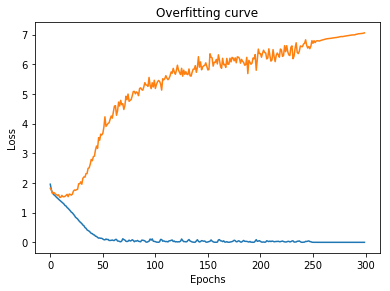

In [7]:
epochs=range(len(History.acc))
fig = plt.figure() 
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
axes.set_xlabel('Epochs') 
axes.set_ylabel('Loss')
axes.set_title('Overfitting curve')
axes.plot(list(epochs),History.losses)
axes.plot(list(epochs),History.val_loss)


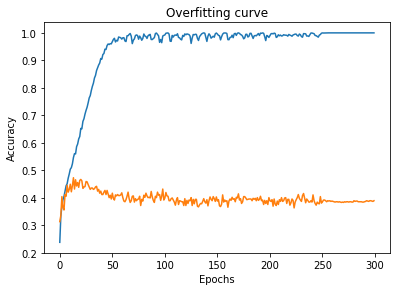

In [8]:
epochs=range(len(History.acc))
fig = plt.figure() 
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
axes.set_xlabel('Epochs') 
axes.set_ylabel('Accuracy')
axes.set_title('Overfitting curve')
axes.plot(list(epochs),History.acc)
axes.plot(list(epochs),History.val_acc)

# Using Batch Normalization

In [14]:
classifier_Normalized_Batch = Sequential()

classifier_Normalized_Batch.add(Conv2D(128,(3,3),input_shape=(64,64,3), activation='relu'))
classifier_Normalized_Batch.add(BatchNormalization())
classifier_Normalized_Batch.add(MaxPooling2D(pool_size=(2,2)))
classifier_Normalized_Batch.add(Conv2D(128,(3,3), activation='relu'))
classifier_Normalized_Batch.add(BatchNormalization())
classifier_Normalized_Batch.add(MaxPooling2D(pool_size=(2,2)))
classifier_Normalized_Batch.add(Flatten())
classifier_Normalized_Batch.add(Dense(units=128, kernel_initializer="uniform", activation="relu"))
classifier_Normalized_Batch.add(Dense(units=8, kernel_initializer="uniform", activation="softmax"))
classifier_Normalized_Batch.compile(loss='categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

In [18]:
class History(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.acc = []
        self.val_loss = []
        self.val_acc = []

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.acc.append(logs.get('acc'))
        self.val_loss.append(logs.get('val_loss'))
        self.val_acc.append(logs.get('val_acc'))

In [19]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        data_format='channels_last')

val_datagen = ImageDataGenerator(rescale=1./255,
        data_format='channels_last')

training_set = train_datagen.flow_from_directory(
        '/Users/simoalami/Documents/Centrale/Machine Learning/Projet/dataset_complete/Training Set',
        target_size=(64,64),
        batch_size=32,
        class_mode='categorical')
    
val_set = val_datagen.flow_from_directory(
    '/Users/simoalami/Documents/Centrale/Machine Learning/Projet/dataset_complete/Validation Set',
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical')

History = History()
classifier_Normalized_Batch.fit_generator(
        training_set,
        steps_per_epoch=5597/32,
        epochs=50,
        validation_data=val_set,
        validation_steps=801/32,callbacks=[History])

Found 5597 images belonging to 8 classes.
Found 801 images belonging to 8 classes.
Epoch 1/50
175/174 [==============================] - 404s 2s/step - loss: 2.5935 - acc: 0.3040 - val_loss: 1.8216 - val_acc: 0.3258
Epoch 2/50
175/174 [==============================] - 400s 2s/step - loss: 1.6495 - acc: 0.3817 - val_loss: 1.8124 - val_acc: 0.3321
Epoch 3/50
175/174 [==============================] - 398s 2s/step - loss: 1.5854 - acc: 0.4134 - val_loss: 1.6967 - val_acc: 0.3883
Epoch 4/50
175/174 [==============================] - 396s 2s/step - loss: 1.5307 - acc: 0.4407 - val_loss: 2.0189 - val_acc: 0.3159
Epoch 5/50
175/174 [==============================] - 396s 2s/step - loss: 1.4659 - acc: 0.4596 - val_loss: 2.8144 - val_acc: 0.1885
Epoch 6/50
175/174 [==============================] - 399s 2s/step - loss: 1.3764 - acc: 0.4969 - val_loss: 2.8725 - val_acc: 0.1698
Epoch 7/50
175/174 [==============================] - 396s 2s/step - loss: 1.2867 - acc: 0.5366 - val_loss: 2.0391 - va

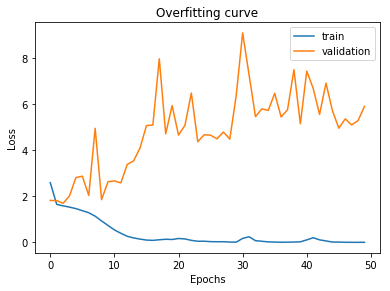

In [23]:
epochs=range(len(History.acc))
fig = plt.figure() 
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
axes.set_xlabel('Epochs') 
axes.set_ylabel('Loss')
axes.set_title('Overfitting curve')
axes.plot(list(epochs),History.losses, label='train')
axes.plot(list(epochs),History.val_loss, label='validation')
axes.legend(loc=0)

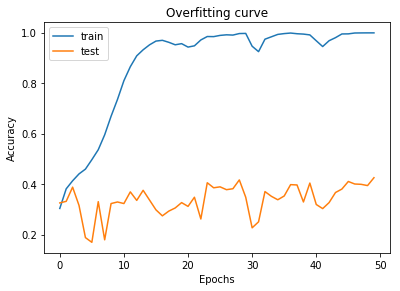

In [24]:
epochs=range(len(History.acc))
fig = plt.figure() 
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
axes.set_xlabel('Epochs') 
axes.set_ylabel('Accuracy')
axes.set_title('Overfitting curve')
axes.plot(list(epochs),History.acc, label='train')
axes.plot(list(epochs),History.val_acc, label="test")
axes.legend(loc=0)

In [30]:
test_datagen = ImageDataGenerator(rescale=1./255,
        data_format='channels_last')

test_set = test_datagen.flow_from_directory(
    '/Users/simoalami/Documents/Centrale/Machine Learning/Projet/dataset_complete/Test Set',
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical')

Found 1599 images belonging to 8 classes.


In [49]:
Y_pred = classifier_Normalized_Batch.predict_generator(test_set, 1599//32+1)
y_pred = np.argmax(Y_pred, axis=1)

In [51]:
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))

Confusion Matrix
[[25 15 48 46 21 18 21 18]
 [23 21 38 48 19 11 21 23]
 [25 15 32 40 24 12 13 17]
 [24 12 43 36 28 12 28  9]
 [26 23 42 43 22  9 18 16]
 [36 14 44 44 18 11 24 21]
 [23 15 50 39 20 15 15 26]
 [24 19 44 36 25  9 21 21]]


# With parameter tunning

It takes way too long to train the model on our machines. Just for demonstration purpose. 
We used keras wrapper to allow for cross validation and parameter tunning

In [23]:
def CNN(filters,dim, optimizer):
    classifier = Sequential()

    classifier.add(Conv2D(filters=filters,(3,3),input_shape=(64,64,3), activation='relu'))
    classifier.add(MaxPooling2D(pool_size=(2,2)))
    classifier.add(Conv2D(32,(3,3), activation='relu'))
    classifier.add(MaxPooling2D(pool_size=(2,2)))
    classifier.add(Flatten())
    classifier.add(Dense(units=dim, kernel_initializer="uniform", activation="relu"))
    classifier.add(Dense(units=8, kernel_initializer="uniform", activation="softmax"))
    classifier.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics= ["accuracy"])
    return classifier

In [20]:
classifier = KerasClassifier(build_fn = CNN)
parameters = [{'epochs': [25],
               'optimizer': ['adam','rmsprop'],
               'dim' : [128,256], filters=[128,256]}] 
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy')


In [94]:
# as we cannot use datagenerator here, it had to be done manually
def get_images(path, img_shape=(64, 64)):
 
    main_path = path
    y = []
    liste = [name for name in os.listdir(main_path) if os.path.isdir(path)]
    
    for name in liste:
        if name=='.DS_Store':
            liste.remove('.DS_Store')
            
    image_collection = []
    for idx,folder in enumerate(liste):
 
        label = idx
        n_channels = 3 
        
 
        sub_list = sorted(os.listdir(os.path.join(main_path,folder)))
 
        for i in tqdm(range(1, len(sub_list))):
            image_path = os.path.join(main_path, folder, sub_list[i])
            read_image = cv2.imread(image_path)
            image_resized = cv2.resize(read_image, img_shape, interpolation=cv2.INTER_CUBIC)
 
            image = np.float32(image_resized)
            image = cv2.normalize(image, image, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX) 
            
 
            image_collection.append(image)
            
            y.append(label)
 
    y=np.asarray(y)
    y = utils.to_categorical(y,num_classes=len(liste))
 
    return image_collection, y

In [95]:
path = str("/Users/simoalami/Documents/Centrale/Machine Learning/Projet/dataset_complete/Training Set")
X_train,y_train = get_images(path,img_shape=(64,64))
X_train, y_train = np.array(X_train), np.array(y_train)

100%|██████████| 80/80 [00:01<00:00, 65.64it/s]


In [96]:
print(y_train[22:30])

[[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]


In [49]:
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/25
380/380 [==============================] - 5s 14ms/step - loss: 1.8206 - acc: 0.2579
Epoch 2/25
380/380 [==============================] - 4s 10ms/step - loss: 1.7041 - acc: 0.2500
Epoch 3/25
380/380 [==============================] - 4s 10ms/step - loss: 1.6548 - acc: 0.2500
Epoch 4/25
380/380 [==============================] - 4s 10ms/step - loss: 1.5903 - acc: 0.3447
Epoch 5/25
380/380 [==============================] - 4s 10ms/step - loss: 1.5370 - acc: 0.4026
Epoch 6/25
380/380 [==============================] - 4s 10ms/step - loss: 1.4791 - acc: 0.4263
Epoch 7/25
 32/380 [=>............................] - ETA: 3s - loss: 1.3967 - acc: 0.6250

KeyboardInterrupt: 

# ANN using numpy arrays

This was not used for the project but just for demonstration purpose

In [32]:
PATH= "/Users/simoalami/Documents/Centrale/Machine Learning/Projet/Spectrograms_FMA_Small"
PATH_Copy= "/Users/simoalami/Documents/Centrale/Machine Learning/Projet/Spectrograms_FMA_Small copie"
PATH_csv="/Users/simoalami/Documents/Centrale/Machine Learning/Projet/Latest_Work/fma_small_labels.csv"
PATH_training ='/Users/simoalami/Documents/Centrale/Machine Learning/Projet/dataset copie/Training Set'
PATH_test='/Users/simoalami/Documents/Centrale/Machine Learning/Projet/dataset copie/Test Set'
PATH_val='/Users/simoalami/Documents/Centrale/Machine Learning/Projet/dataset copie/Validation Set'

data=pd.read_csv(PATH_csv)
print(data.shape)
data.head()

(8000, 3)


,track_id,parent_genre_id,parent_genre_title
0,2,21,Hip-Hop
1,5,21,Hip-Hop
2,10,10,Pop
3,140,17,Folk
4,141,17,Folk


In [34]:
#create arrays including spectrograms and their corresponding genre
X = []
y = []
files=[]
for filename in os.walk(PATH):
    if isfile:
        files.append(filename[2])

liste_int=[]

for liste in files:
    for i in liste:
        if i!='.DS_Store'and i!=".png":
            liste_int.append(i)
            
shuffle(liste_int)            

for file in liste_int:
    genre=file.strip(" ").split(".")[0]
    y.append(genre)
    image = cv2.imread (PATH+"/"+file)
    X.append(image)

In [35]:
np.asarray(X).shape

(815, 400, 1000, 3)

In [36]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [37]:
labelencoder_X_1 = LabelEncoder()
y_train = labelencoder_X_1.fit_transform(y_train)
#Y_val = labelencoder_X_1.fit_transform(Y_val)
y_test = labelencoder_X_1.fit_transform(y_test)

In [9]:
y_test

array([1, 3, 2, 7, 0, 2, 7, 5, 4, 7, 1, 4, 3, 6, 0, 5, 2, 2, 7, 3, 1, 2,
       2, 2, 2, 7, 2, 7, 7, 2, 7, 2, 5, 5, 2, 3, 5, 2, 1, 7, 1, 5, 5, 5,
       1, 5, 2, 6, 5, 5, 3, 1, 3, 3, 6, 2, 5, 2, 5, 1, 2, 6, 4, 5, 2, 1,
       2, 1, 5, 3, 5, 5, 2, 3, 1, 6, 5, 3, 3, 7, 2, 0, 7, 3, 7, 6, 0, 7,
       2, 2, 2, 5, 3, 2, 5, 7, 5, 5, 7, 2, 5, 2, 0, 7, 7, 7, 3, 2, 5, 3,
       2, 2, 2, 5, 1, 3, 3, 3, 5, 4, 7, 2, 1, 6, 1, 2, 5, 5, 5, 7, 4, 3,
       5, 3, 6, 2, 3, 2, 1, 2, 7, 2, 3, 5, 3, 3, 5, 1, 5, 6, 5, 1, 3, 5,
       3, 7, 7, 5, 5, 6, 7, 4, 2])

In [43]:
y_train

array([1, 5, 2, 1, 5, 1, 2, 2, 5, 4, 0, 2, 1, 6, 1, 0, 5, 4, 3, 2, 2, 7,
       7, 4, 5, 2, 1, 7, 2, 2, 1, 5, 4, 7, 2, 7, 5, 2, 5, 2, 5, 3, 1, 7,
       5, 3, 6, 2, 6, 1, 3, 0, 5, 5, 2, 0, 2, 2, 7, 6, 3, 5, 3, 2, 2, 7,
       2, 1, 5, 5, 7, 7, 2, 6, 3, 3, 1, 3, 5, 7, 7, 2, 5, 1, 6, 0, 5, 5,
       3, 6, 6, 2, 6, 2, 7, 6, 7, 2, 5, 1, 5, 2, 3, 5, 3, 5, 3, 5, 4, 2,
       7, 3, 6, 3, 5, 2, 3, 7, 5, 1, 1, 5, 1, 7, 7, 2, 3, 4, 5, 5, 0, 3,
       2, 5, 2, 5, 3, 4, 7, 7, 3, 2, 2, 4, 2, 3, 2, 5, 5, 1, 7, 2, 0, 3,
       1, 4, 1, 2, 5, 1, 2, 2, 4, 3, 1, 6, 3, 3, 2, 1, 2, 5, 2, 1, 6, 2,
       5, 2, 3, 5, 7, 3, 5, 2, 2, 1, 1, 3, 7, 4, 2, 2, 7, 7, 1, 2, 0, 6,
       5, 2, 1, 1, 3, 5, 3, 1, 1, 2, 3, 2, 5, 3, 5, 7, 5, 7, 7, 7, 7, 1,
       2, 6, 0, 6, 5, 3, 2, 0, 5, 1, 7, 3, 2, 3, 5, 0, 3, 1, 3, 0, 5, 7,
       3, 7, 3, 5, 0, 7, 1, 2, 5, 1, 5, 6, 6, 0, 2, 2, 5, 1, 2, 5, 7, 7,
       2, 3, 5, 1, 3, 6, 5, 6, 1, 1, 2, 1, 3, 1, 2, 5, 7, 3, 2, 5, 3, 3,
       3, 2, 7, 6, 1, 2, 6, 2, 5, 3, 6, 2, 0, 2, 6,

In [41]:
#Reshaping X_rain to fit in input_shape
X_train=np.asarray(X_train)
X_train=X_train.reshape(-1,400*1000*3)

In [74]:
def build_classifier(optimizer, rate):
    classifier = Sequential()
    classifier.add(Dense(units=32,kernel_initializer= 'uniform',activation="relu", input_shape=(X_train.shape[1],)))
    classifier.add(Dropout(rate=rate))
    classifier.add(Dense(units=32,kernel_initializer= 'uniform',activation="relu"))
    classifier.add(Dropout(rate=rate))
    classifier.add(Dense(units=8,kernel_initializer= 'uniform',activation="softmax"))
    classifier.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics= ["accuracy"])
    return classifier

classifier=KerasClassifier(build_fn=build_classifier,batch_size=32)


#parameters={'epochs':[1,2],"optimizer":["adam", "sgd"], "rate":[0.1,0.2]}
parameters={'epochs':[1],"optimizer":["adam"], "rate":[0.1]}
grid_search=GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy', cv=[(slice(None), slice(None))])
grid_search.fit(X_train,y_train)
best_parameters= grid_search.best_params_
#best_accuracy=grid_search.best_score_

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:643: DeprecationWarning: "fit_params" as a constructor argument was deprecated in version 0.19 and will be removed in version 0.21. Pass fit parameters to the "fit" method instead.
  '"fit" method instead.', DeprecationWarning)


Epoch 1/1
652/652 [==============================] - 41s 62ms/step - loss: 14.8838 - acc: 0.0752
Epoch 1/1
652/652 [==============================] - 39s 60ms/step - loss: 14.6843 - acc: 0.0890


In [75]:
History.losses

[14.684293319842567]

In [59]:
print(best_parameters)

{'epochs': 2, 'optimizer': 'adam', 'rate': 0.1}


In [67]:
Y_Test=to_categorical(y_test)
Y_Train=to_categorical(y_train)

In [ ]:
class History(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.acc = []
        self.val_loss = []
        self.val_acc = []

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.acc.append(logs.get('acc'))
        self.val_loss.append(logs.get('val_loss'))
        self.val_acc.append(logs.get('val_acc'))

In [78]:
#We have to do it again with the best params found earlier in order to have all the callbacks
classifier = Sequential()
classifier.add(Dense(units=32,kernel_initializer= 'uniform',activation="relu", input_shape=(X_train.shape[1],)))
classifier.add(Dropout(rate=best_parameters['rate']))
classifier.add(Dense(units=32,kernel_initializer= 'uniform',activation="relu"))
classifier.add(Dropout(rate=best_parameters['rate']))
classifier.add(Dense(units=8,kernel_initializer= 'uniform',activation="softmax"))
classifier.compile(optimizer=best_parameters['optimizer'], loss='categorical_crossentropy', metrics= ["accuracy"])
History=History()
classifier.fit(X_train,Y_Train,batch_size=32, epochs=best_parameters['epochs'],callbacks=[History])

Epoch 1/1
652/652 [==============================] - 40s 61ms/step - loss: 12.6819 - acc: 0.2132


In [79]:
History.losses


[12.681876112347]